In [31]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 12]

In [32]:
def show(img):
    flip = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    flip = flip.astype('float32')
    flip /= np.max(flip)
    plt.imshow(flip)

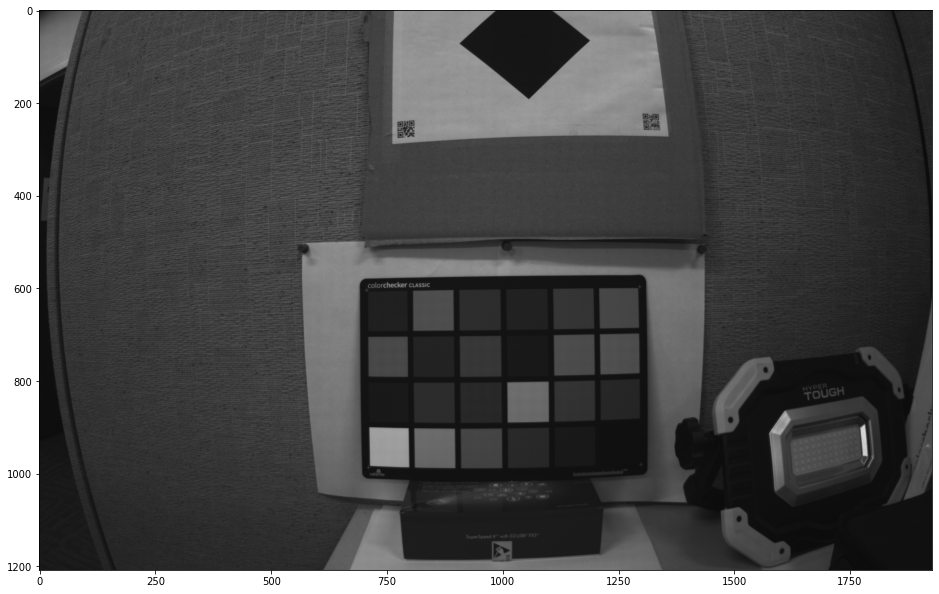

In [33]:
x = np.fromfile('ar0231_a.raw', 'uint16')
img = np.reshape(x, (1208, 1928))
show(img)

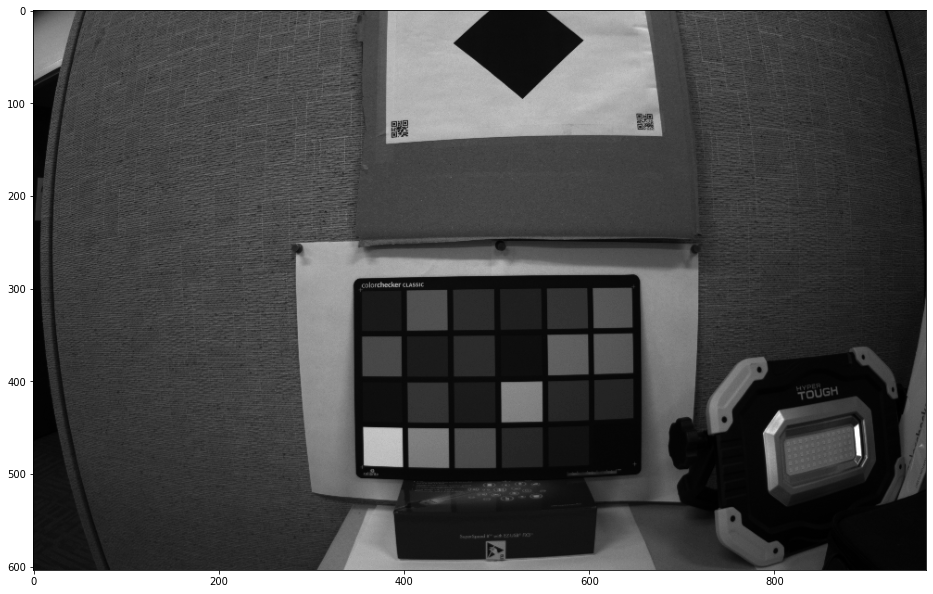

In [34]:
g1 = img[0::2, 0::2]
g2 = img[1::2, 1::2]
b = img[1::2, 0::2]
r = img[0::2, 1::2]
plt.imshow(g2, cmap='gray')
g1.tofile('g1.raw')
g2.tofile('g2.raw')
b.tofile('b.raw')
r.tofile('r.raw')

In [35]:
def save_diff(channel, file):
    cf = channel.flatten().astype('int16')
    diff = np.diff(cf)
    diff.tofile(file)
    return diff

In [36]:
g1d = save_diff(g1, 'g1d.bin')
g2d = save_diff(g2, 'g2d.bin')
rd = save_diff(r, 'rd.bin')
bd = save_diff(b, 'bd.bin')

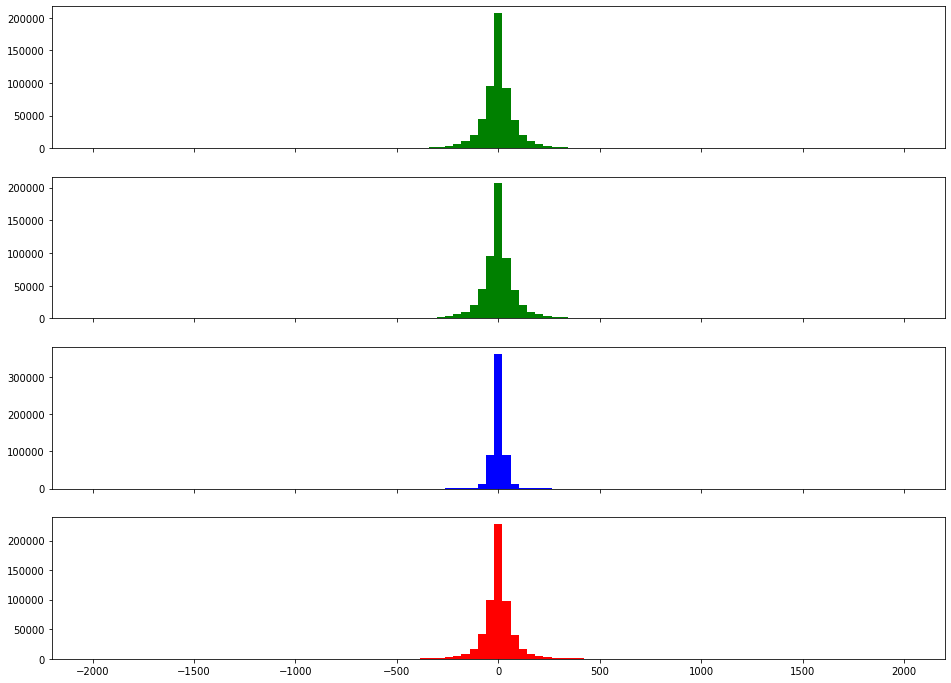

In [37]:
fig, ax = plt.subplots(4, 1, sharex=True)
h = ax[0].hist(g1d, bins=np.linspace(-2000, 2000, 100), color='green')
h = ax[1].hist(g2d, bins=np.linspace(-2000, 2000, 100), color='green')
h = ax[2].hist(bd, bins=np.linspace(-2000, 2000, 100), color='blue')
h = ax[3].hist(rd, bins=np.linspace(-2000, 2000, 100), color='red')

In [38]:
!./bfc.exe c rice16s g1d.bin g1d.bin.rice
!./bfc.exe c rice16s g2d.bin g2d.bin.rice
!./bfc.exe c rice16s bd.bin bd.bin.rice
!./bfc.exe c rice16s rd.bin rd.bin.rice

Rice 16-bit signed compress g1d.bin to g1d.bin.rice...
Input file: 1164510 bytes
Output file: 603817 bytes (51.9%)
Rice 16-bit signed compress g2d.bin to g2d.bin.rice...
Input file: 1164510 bytes
Output file: 603915 bytes (51.9%)
Rice 16-bit signed compress bd.bin to bd.bin.rice...
Input file: 1164510 bytes
Output file: 507615 bytes (43.6%)
Rice 16-bit signed compress rd.bin to rd.bin.rice...
Input file: 1164510 bytes
Output file: 586622 bytes (50.4%)


In [39]:
import os
tot_size = 0
tot_size += os.path.getsize('g1d.bin.rice')
tot_size += os.path.getsize('g2d.bin.rice')
tot_size += os.path.getsize('bd.bin.rice')
tot_size += os.path.getsize('rd.bin.rice')
print(tot_size)
org_size = os.path.getsize('ar0231_a.raw')
print(f'Total size: {org_size}  Compressed size: {tot_size}  Ratio: {tot_size/org_size}')

2302017
Total size: 4658048  Compressed size: 2302017  Ratio: 0.4942020777802204


In [40]:
!./bfc.exe d g1d.bin.rice g1d_new.bin
!./bfc.exe d g2d.bin.rice g2d_new.bin
!./bfc.exe d bd.bin.rice bd_new.bin
!./bfc.exe d rd.bin.rice rd_new.bin

Rice 16-bit signed decompress g1d.bin.rice to g1d_new.bin...
Input file: 603817 bytes
Output file: 1164510 bytes
Rice 16-bit signed decompress g2d.bin.rice to g2d_new.bin...
Input file: 603915 bytes
Output file: 1164510 bytes
Rice 16-bit signed decompress bd.bin.rice to bd_new.bin...
Input file: 507615 bytes
Output file: 1164510 bytes
Rice 16-bit signed decompress rd.bin.rice to rd_new.bin...
Input file: 586622 bytes
Output file: 1164510 bytes


In [41]:
def make_channel(file, start_pixel, shape):
    gd_new = np.fromfile(file, 'int16')
    start_pixel = start_pixel.astype('int16')
    res = []
    res.append(start_pixel)
    for d in gd_new:
        start_pixel += d
        res.append(start_pixel)

    res = np.array(res)
    res = np.reshape(res, (shape[0]//2, shape[1]//2))
    return res

In [42]:
g1_res = make_channel('g1d_new.bin', g1[0,0], img.shape)
g2_res = make_channel('g2d_new.bin', g2[0,0], img.shape)
b_res = make_channel('bd_new.bin', b[0,0], img.shape)
r_res = make_channel('rd_new.bin', r[0,0], img.shape)


In [44]:
res = np.zeros(img.shape, 'uint16')
res[0::2, 0::2] = g1_res
res[1::2, 1::2] = g2_res
res[1::2, 0::2] = b_res
res[0::2, 1::2] = r_res

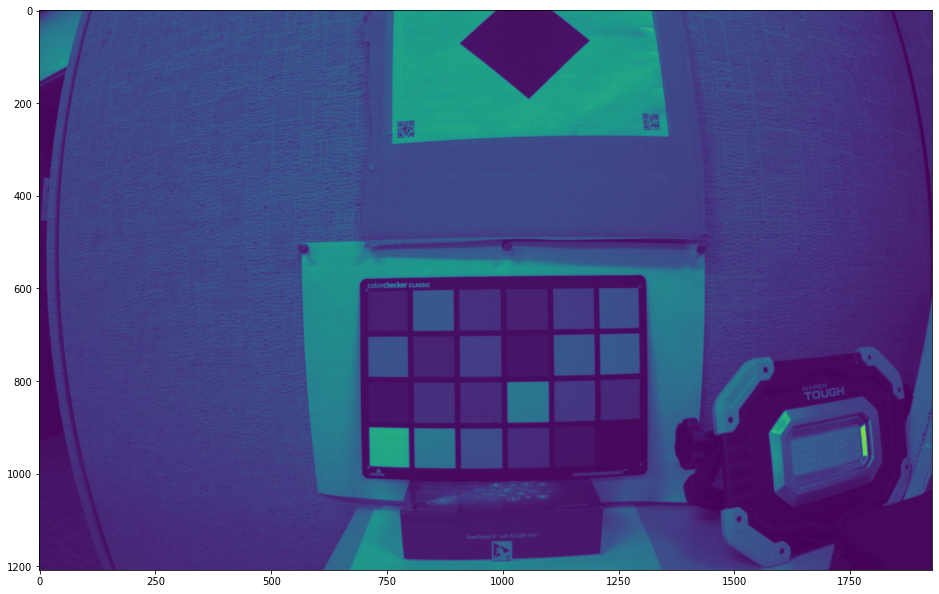

In [45]:
plt.imshow(res)